In [1]:
# Importing required libraries
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# Read data from an Excel file named "b.xlsx" and store it in a DataFrame

df = pd.read_excel("b.xlsx")

In [3]:
# Proper renaming of few fields
df.rename(columns = {"Profit":"profit", "AGE": "Age"}, inplace = True)

In [4]:
# Creating a copy of DataFrame so as to avoid long names
b = df.copy()

In [5]:
# Get the column names of the DataFrame
b.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'yyyy',
       'Age', 'Group', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [6]:
# Checking the dataset
pd.set_option('display.max_columns', None)
b.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,yyyy,Age,Group,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,94,86,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,5157,47,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,9785,72,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,13424,2,2017-02-21,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016,New South Wales,Australia,10


In [7]:
# Remove unnecessary columns from DataFrame 'b' that we won't be using in our analysis and model building:
b.drop(['transaction_id','country','address','order_status','transaction_date','deceased_indicator','first_name','last_name','list_price','standard_cost'],inplace = True,axis = 1)

In [8]:
b.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,yyyy,Age,Group,product_id,online_order,brand,product_line,product_class,product_size,product_first_sold_date,profit,postcode,state,property_valuation
0,1,Female,93,Health,Mass Customer,Yes,11,1953,64,56-65,86,0,OHM Cycles,Standard,medium,medium,2005-05-10,110.56,2016,New South Wales,10
1,1,Female,93,Health,Mass Customer,Yes,11,1953,64,56-65,38,1,Solex,Standard,medium,medium,2008-03-19,751.02,2016,New South Wales,10
2,1,Female,93,Health,Mass Customer,Yes,11,1953,64,56-65,47,1,Trek Bicycles,Road,low,small,2003-07-21,189.28,2016,New South Wales,10
3,1,Female,93,Health,Mass Customer,Yes,11,1953,64,56-65,72,0,Norco Bicycles,Standard,medium,medium,2003-09-09,90.10,2016,New South Wales,10
4,1,Female,93,Health,Mass Customer,Yes,11,1953,64,56-65,2,0,Solex,Standard,medium,medium,2005-08-09,17.87,2016,New South Wales,10


In [9]:
# Create a list of column names to be selected from DataFrame 'b'
list = ['gender',
        'job_industry_category', 'wealth_segment', 'owns_car',
         'online_order', 'brand', 'product_line', 'product_class',
        'product_size', 'product_first_sold_date', 'postcode', 'state',
        'property_valuation', 'profit']

In [10]:
# Iterate through the list of column names and print unique values for each column in DataFrame 'b'
for i in list:
    print("________________"+i+"_____________")
    print(b[i].unique())

________________gender_____________
['Female' 'Male' 'Unspecified']
________________job_industry_category_____________
['Health' 'Financial Services' 'IT' nan 'Manufacturing' 'Retail'
 'Agriculture' 'Property' 'Telecommunications' 'Entertainment']
________________wealth_segment_____________
['Mass Customer' 'Affluent Customer' 'High Net Worth']
________________owns_car_____________
['Yes' 'No']
________________online_order_____________
[0 1]
________________brand_____________
['OHM Cycles' 'Solex' 'Trek Bicycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
________________product_line_____________
['Standard' 'Road' 'Mountain' 'Touring']
________________product_class_____________
['medium' 'low' 'high']
________________product_size_____________
['medium' 'small' 'large']
________________product_first_sold_date_____________
<DatetimeArray>
['2005-05-10 00:00:00', '2008-03-19 00:00:00', '2003-07-21 00:00:00',
 '2003-09-09 00:00:00', '2005-08-09 00:00:00', '1991-11-10 00:00:00',
 '1991

In [11]:
# Iterate through the list of column names & print the no.of unique values & their counts for each column in DataFrame 'b'
for i in list:
    print("________________"+i+"_____________")
    print(b[i].nunique())
    print(b[i].value_counts())

________________gender_____________
3
gender
Female         13290
Male           12413
Unspecified      446
Name: count, dtype: int64
________________job_industry_category_____________
9
job_industry_category
Manufacturing         6314
Financial Services    6116
Health                4831
Retail                1746
Property              1278
IT                    1060
Entertainment          694
Agriculture            566
Telecommunications     352
Name: count, dtype: int64
________________wealth_segment_____________
3
wealth_segment
Mass Customer        13111
High Net Worth        6702
Affluent Customer     6336
Name: count, dtype: int64
________________owns_car_____________
2
owns_car
No     13127
Yes    13022
Name: count, dtype: int64
________________online_order_____________
2
online_order
1    13342
0    12807
Name: count, dtype: int64
________________brand_____________
6
brand
Solex             5596
WeareA2B          4404
Giant Bicycles    4368
OHM Cycles        4039
Trek Bicycles

In [12]:
# List of columns for label encoding
label_encoding= ['wealth_segment','brand','job_industry_category','product_line']

# List of columns for one-hot encoding
hot_encoding =['owns_car','product_class','product_size','state','gender']

In [13]:
# Import the preprocessing module from scikit-learn for label encoding
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
# The label_encoder object will be used to perform label encoding on categorical data.
label_encoder = preprocessing.LabelEncoder()


In [14]:
# Perform label encoding for columns specified in the 'label_encoding' list
for i in label_encoding:
    # Encode labels in column 'species'.
    b[i]= label_encoder.fit_transform(b[i])

In [15]:
# Perform one-hot encoding for columns specified in the 'hot_encoding' list
for j in hot_encoding:
    b = pd.get_dummies(b,columns = [j],drop_first=True)
    
     # Use pd.get_dummies() to create binary columns for each category within the specified column
    # 'drop_first=True' drops the first category to prevent multicollinearity

In [16]:
b.head()

,customer_id,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,tenure,yyyy,Age,Group,product_id,online_order,brand,product_line,product_first_sold_date,profit,postcode,property_valuation,owns_car_Yes,product_class_low,product_class_medium,product_size_medium,product_size_small,state_Queensland,state_Victoria,gender_Male,gender_Unspecified
0,1,93,3,2,11,1953,64,56-65,86,0,2,2,2005-05-10,110.56,2016,10,True,False,True,True,False,False,False,False,False
1,1,93,3,2,11,1953,64,56-65,38,1,3,2,2008-03-19,751.02,2016,10,True,False,True,True,False,False,False,False,False
2,1,93,3,2,11,1953,64,56-65,47,1,4,1,2003-07-21,189.28,2016,10,True,True,False,False,True,False,False,False,False
3,1,93,3,2,11,1953,64,56-65,72,0,1,2,2003-09-09,90.10,2016,10,True,False,True,True,False,False,False,False,False
4,1,93,3,2,11,1953,64,56-65,2,0,3,2,2005-08-09,17.87,2016,10,True,False,True,True,False,False,False,False,False


In [17]:
# Identify boolean columns by their data type (bool)
boolean_columns = b.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0s and 1s)
b[boolean_columns] = b[boolean_columns].astype(int)

In [18]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          26149 non-null  int64         
 1   past_3_years_bike_related_purchases  26149 non-null  int64         
 2   job_industry_category                26149 non-null  int32         
 3   wealth_segment                       26149 non-null  int32         
 4   tenure                               26149 non-null  int64         
 5   yyyy                                 26149 non-null  int64         
 6   Age                                  26149 non-null  int64         
 7   Group                                26149 non-null  object        
 8   product_id                           26149 non-null  int64         
 9   online_order                         26149 non-null  int64         
 10  brand     

In [19]:
# Check for null values
list_b = ['customer_id', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'tenure', 'Age',
       'product_id', 'online_order', 'brand', 'product_line',
       'product_first_sold_date', 'postcode', 'property_valuation', 'profit',
       'owns_car_Yes', 'product_class_low', 'product_class_medium',
       'product_size_medium', 'product_size_small', 'state_Queensland',
       'state_Victoria', 'gender_Male', 'gender_Unspecified']
for k in list_b:
    print("________"+k+"_________")
    print(b[k].isnull().sum())
    
# This code iterates through the columns listed in 'list_b' and checks for the count of null values in each column.


________customer_id_________
0
________past_3_years_bike_related_purchases_________
0
________job_industry_category_________
0
________wealth_segment_________
0
________tenure_________
0
________Age_________
0
________product_id_________
0
________online_order_________
0
________brand_________
0
________product_line_________
0
________product_first_sold_date_________
0
________postcode_________
0
________property_valuation_________
0
________profit_________
0
________owns_car_Yes_________
0
________product_class_low_________
0
________product_class_medium_________
0
________product_size_medium_________
0
________product_size_small_________
0
________state_Queensland_________
0
________state_Victoria_________
0
________gender_Male_________
0
________gender_Unspecified_________
0


In [20]:
# Calculate the median value of the 'Age' column in DataFrame 'b'
media_b = b['Age'].median()

In [21]:
# Fill missing values in the 'Age' column with the calculated median value
b['Age'].fillna(media_b,inplace = True)

In [22]:
# Check the count of remaining missing values in the 'Age' column after filling with median
b['Age'].isnull().sum()

0

In [23]:
b.drop("Group", axis = 1, inplace = True)

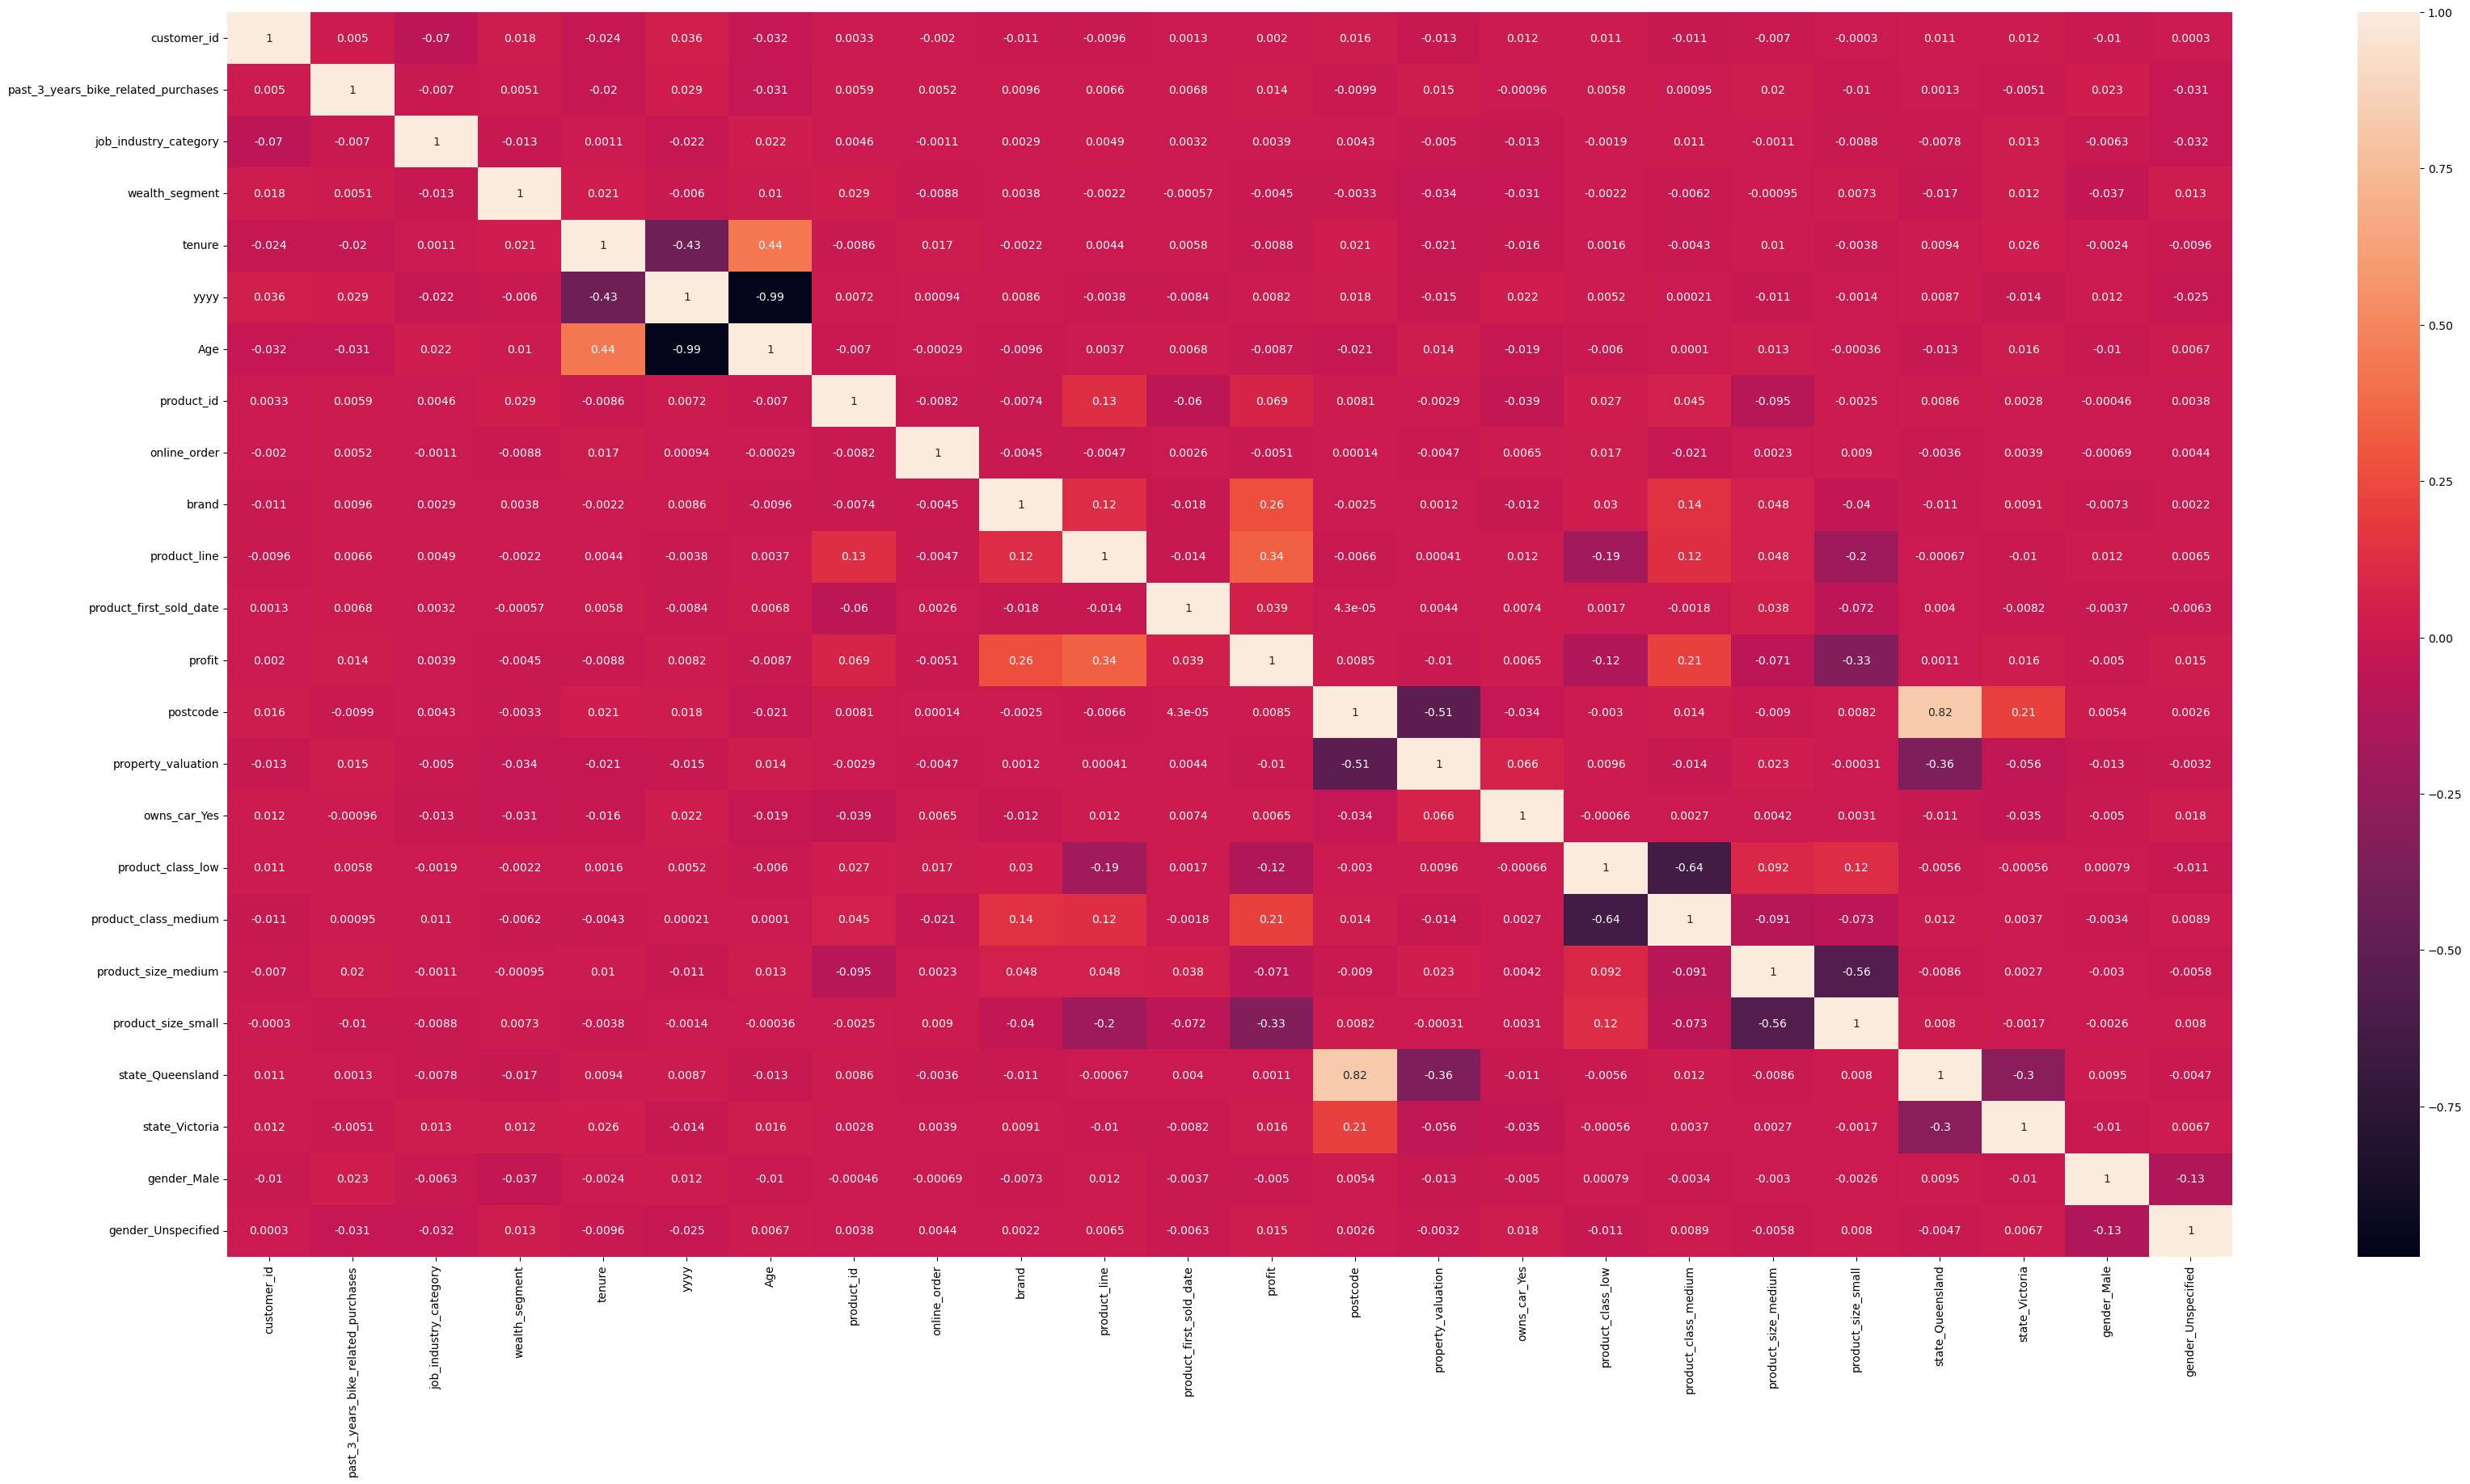

In [24]:
# Create a heatmap to visualize the correlation between columns in DataFrame 'b'
plt.figure(figsize=(40,20))
sns.heatmap(b.corr(),annot = True)
plt.show()

In [25]:
# Calculate the mean value of the 'profit' column in DataFrame 'b'
b['profit'].mean()

553.1971509426747

In [26]:
# Calculate and print the maximum and minimum values of the 'profit' column in DataFrame 'b'
print("max ",b['profit'].max())
print("min ",b['profit'].min())

max  1702.55
min  4.8


In [27]:
# Apply a lambda function to transform 'profit' values to binary values in DataFrame 'b'
# This is a required step to apply classification models and for finding Most Profitable Wealth Segment
# profit is our target field: from here only we will be finding about the most profitable segment through "Reverse Engineering"

b['profit'] = b['profit'].apply(lambda x : 0 if x < 552 else 1 )

In [28]:
# Count the occurrences of each unique value in the 'profit' column
b['profit'].value_counts()

profit
0    15747
1    10402
Name: count, dtype: int64

In [29]:
# Create the independent variable 'X' by dropping the 'profit' column from DataFrame 'b'
X= b.drop(['profit'],axis =1)

# Create the target variable 'y' by selecting the 'profit' column from DataFrame 'b'
y = b['profit']

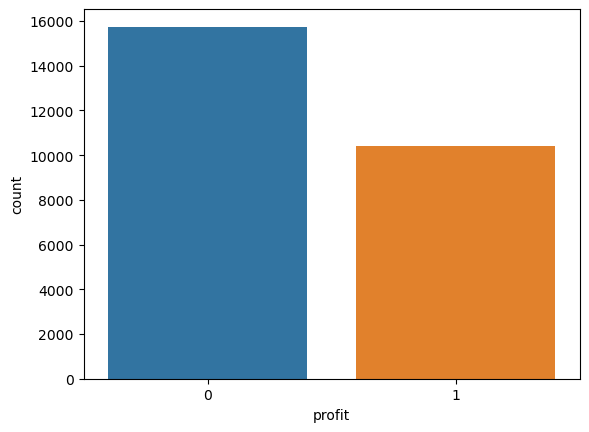

In [30]:
# Create a count plot to visualize the distribution of target variable 'y'
sns.countplot(x=y)
plt.show()

In [31]:
# Inference from the above plot: The dataset is not perfectly balanced: However the above data too can be worked as the imbalancing is not much.
# But still going forward we will be making our models upon the balanced data

In [32]:
# Checking the dataset (X):
pd.set_option('display.max_columns', None)
X.head()

,customer_id,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,tenure,yyyy,Age,product_id,online_order,brand,product_line,product_first_sold_date,postcode,property_valuation,owns_car_Yes,product_class_low,product_class_medium,product_size_medium,product_size_small,state_Queensland,state_Victoria,gender_Male,gender_Unspecified
0,1,93,3,2,11,1953,64,86,0,2,2,2005-05-10,2016,10,1,0,1,1,0,0,0,0,0
1,1,93,3,2,11,1953,64,38,1,3,2,2008-03-19,2016,10,1,0,1,1,0,0,0,0,0
2,1,93,3,2,11,1953,64,47,1,4,1,2003-07-21,2016,10,1,1,0,0,1,0,0,0,0
3,1,93,3,2,11,1953,64,72,0,1,2,2003-09-09,2016,10,1,0,1,1,0,0,0,0,0
4,1,93,3,2,11,1953,64,2,0,3,2,2005-08-09,2016,10,1,0,1,1,0,0,0,0,0


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          26149 non-null  int64         
 1   past_3_years_bike_related_purchases  26149 non-null  int64         
 2   job_industry_category                26149 non-null  int32         
 3   wealth_segment                       26149 non-null  int32         
 4   tenure                               26149 non-null  int64         
 5   yyyy                                 26149 non-null  int64         
 6   Age                                  26149 non-null  int64         
 7   product_id                           26149 non-null  int64         
 8   online_order                         26149 non-null  int64         
 9   brand                                26149 non-null  int32         
 10  product_li

In [34]:
# Convert datetime column(s) to numerical format
X['product_first_sold_date'] = pd.to_numeric(X['product_first_sold_date'])

# Now, applying SMOTE to balance the datset:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)


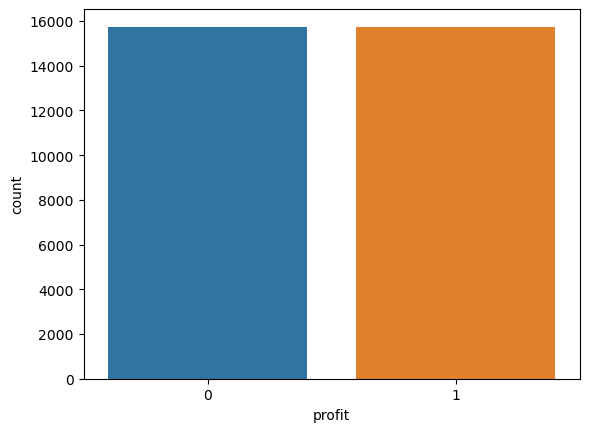

In [35]:
# Eaxming Balancing if the data
# Creating Count plot
sns.countplot(x=y_balanced)
plt.show()

In [36]:
# Import the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 'test_size=0.2' specifies that 20% of the data will be used for testing
# 'random_state=42' sets a random seed for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X_balanced, y_balanced,test_size=0.2,random_state=42)

In [37]:
# RFE -  (Recursive Feature Elimination) 

In [38]:
# Import the LogisticRegression model and Recursive Feature Elimination (RFE) from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [39]:
# Create an instance of the LogisticRegression model for estimation
estimate = LogisticRegression()

In [40]:
# Create an instance of RFE with Logistic Regression estimator
# Set 'n_features_to_select' to 20
selector = RFE(estimate,n_features_to_select=20)

# Fit the RFE selector on the training data
selector.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [41]:
# Get the selected feature columns based on the RFE selector's support
col = X_train.columns[selector.support_]

In [42]:
len(col)

20

In [43]:
# Select and assign the selected feature columns to the training and testing sets
X_train = X_train[col]
X_test = X_test[col]

In [44]:
# Import the statsmodels library and add a constant to the training and testing feature sets
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train,has_constant='add')
X_test_sm = sm.add_constant(X_test,has_constant='add')

In [45]:
# Create a Generalized Linear Model (GLM) for logistic regression using statsmodels
model = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                25195
Model:                            GLM   Df Residuals:                    25194
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17455.
Date:                Tue, 10 Oct 2023   Deviance:                       34910.
Time:                        16:29:53   Pearson chi2:                 2.52e+04
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0006688
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [46]:
# Inference: All the 20 variables selected by the model are significant (none p value > 0.05)

In [47]:
# Import the variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty DataFrame to store VIF values
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns


# Calculate and store the VIF values for each feature in the "VIF" column
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,0.000000
1,customer_id,0.861398
2,past_3_years_bike_related_purchases,0.925231
3,job_industry_category,0.903068
4,wealth_segment,0.943964
5,tenure,0.906660
6,yyyy,0.001319
7,Age,0.762037
8,product_id,0.922617
9,online_order,0.975461


In [48]:
# Inference: none of the selected features have VIF value > 5: No feature needs to be dropped

In [49]:
# Create predictions and assemble the training results in a DataFrame
train_pred=result.predict(X_train_sm)

# Create a DataFrame 'train' containing predicted probabilities and actual target values
train=pd.DataFrame(train_pred,columns=["predicted_probs"])
train["actual"]=y_train

# Assign 1 if predicted probability is greater than 0.5, else assign 0
train["predicted"]=np.where(train["predicted_probs"]>0.5,1,0)# by default 0.5

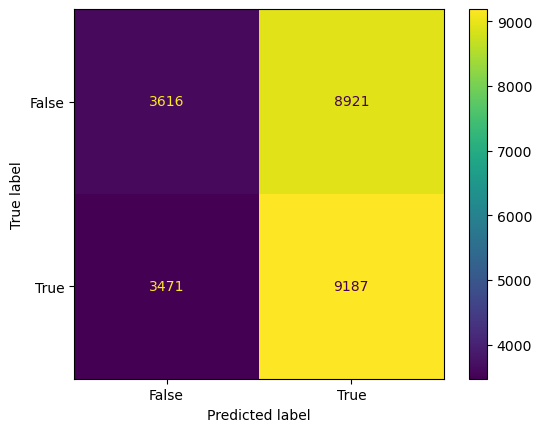

In [50]:
# Creating Confusion Matrix
from sklearn import metrics

# Calculate the confusion matrix using the actual and predicted values from the 'train' DataFrame
confusion_matrix=metrics.confusion_matrix(train["actual"],train["predicted"])

# Create a ConfusionMatrixDisplay for visualization
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [51]:
# Print the training data's accuracy, recall, and precision scores: Logistic Regression: 
print("Train Accuracy:",round(metrics.accuracy_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Recall:",round(metrics.recall_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Precision:",round(metrics.precision_score(train["actual"],train["predicted"])*100,2),"%")

Train Accuracy: 50.82 %
Train Recall: 72.58 %
Train Precision: 50.73 %


In [52]:
# Create predictions and assemble the testing results in a DataFrame
test_pred=result.predict(X_test_sm)
test=pd.DataFrame(test_pred,columns=["predicted_probs"])
test["actual"]=y_test

# Assign 1 if predicted probability is greater than 0.5, else assign 0
test["predicted"]=np.where(test["predicted_probs"]>0.5,1,0)# by default 0.5


In [53]:
# Printing the test accuracy, recall and precision: Logistic Regression: 
print("Test Accuracy:",round(metrics.accuracy_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Recall:",round(metrics.recall_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Precision:",round(metrics.precision_score(test["actual"],test["predicted"])*100,2),"%")

Test Accuracy: 51.15 %
Test Recall: 73.32 %
Test Precision: 50.13 %


In [54]:
# Import necessary modules and calculate ROC curve and AUC score
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,test_pred)

# Print the ROC AUC score and the AUC score
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.523694669760753
Auc_score =  0.523694669760753


Text(0.5, 0, 'False Positive Rate')

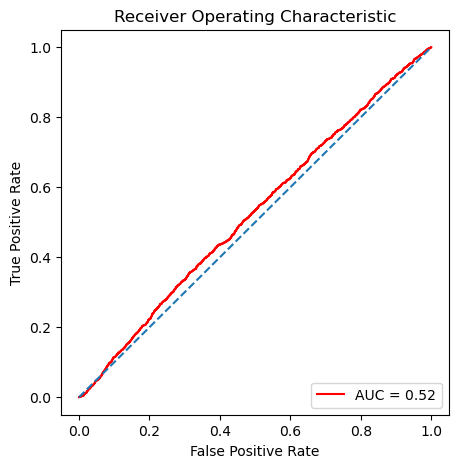

In [55]:
# Import the necessary module and create the ROC curve plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))# Set the size of the plot
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve with the true positive rate and false positive rate
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right') # Add a legend to the plot
plt.plot([0, 1], [0, 1],linestyle='--')

# Set the axis labels
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Decision Tree

In [56]:
# Import the DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Create an instance of the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [58]:
# Import KFold and GridSearchCV modules from scikit-learn for cross-validation and hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [59]:
# Define a dictionary of hyperparameters for the Decision Tree
parametre = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(0,10),
    'min_samples_split': range(0,10),
    'min_samples_leaf': range(0,10)
}

In [60]:
# Create a GridSearchCV instance for hyperparameter tuning
tree = GridSearchCV(dtree,parametre,cv= 5,scoring='accuracy',return_train_score=True,n_jobs = -1)

In [61]:
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [62]:
# Fit the GridSearchCV instance on the training data
tree.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [63]:
# Finding the result of the Grid Search CV:
tree_result = pd.DataFrame(tree.cv_results_)

In [64]:
tree_result.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013956,0.003423,0.0,0.0,gini,0,0,0,"{'criterion': 'gini', 'max_depth': 0, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.016012,0.002987,0.0,0.0,gini,0,0,1,"{'criterion': 'gini', 'max_depth': 0, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Finding the best parameters resulting from gridsearchcv
tree.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [66]:
# Finding the score resulting from the best parameters of GridSearchCV
tree.best_score_

0.9233181186743401

In [67]:
# Building the Model (Decision Tree) on the best parameters 
best_tree = tree.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [68]:
# Fitting the Model on training dataset
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [69]:
# predicting it on Test
y_pred_test = best_tree.predict(X_test)

In [70]:
# checking the accuracy for test dataset
metrics.accuracy_score(y_test,y_pred_test)

0.9295126210509604

In [71]:
# predicting it on train dataset
y_prob_train = best_tree.predict(X_train)

In [72]:
# checking the accuracy for train dataset
metrics.accuracy_score(y_train,y_prob_train)

0.9273268505655884

In [73]:
# Print the training dataset's accuracy, recall, and precision scores: Decision Tree
print("Train Accuracy:",round(metrics.accuracy_score(y_train,y_prob_train)*100,2),"%")
print("Train Recall:",round(metrics.recall_score(y_train,y_prob_train)*100,2),"%")
print("Train Precision:",round(metrics.precision_score(y_train,y_prob_train)*100,2),"%")

Train Accuracy: 92.73 %
Train Recall: 94.96 %
Train Precision: 90.97 %


In [74]:
# checking with Roc/Auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_test)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.9299625139551558
Auc_score =  0.9299625139551558


Text(0.5, 0, 'False Positive Rate')

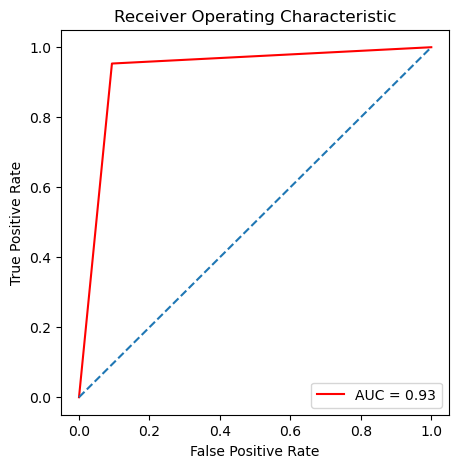

In [75]:
# plotting the curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [76]:
# Printing the test accuracy, recall and precision: Decision Tree
print("Test Accuracy:",round(metrics.accuracy_score(y_test,y_pred_test)*100,2),"%")
print("Test Recall:",round(metrics.recall_score(y_test,y_pred_test)*100,2),"%")
print("Test Precision:",round(metrics.precision_score(y_test,y_pred_test)*100,2),"%")

Test Accuracy: 92.95 %
Test Recall: 95.34 %
Test Precision: 90.76 %


# Random Forest

In [77]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
# fitting the model
Model_RFC = RandomForestClassifier(random_state=42)
Model_RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Training the data

In [79]:
# defining the parameters
parametre_ran={
      'n_estimators': range(0,10),
    'max_depth': range(0,5),
    'min_samples_split': range(0,5),
    'min_samples_leaf': range(0,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [80]:
# using GridSearchCV to use defined parameters in training the models
grid_random = GridSearchCV(Model_RFC,parametre_ran,cv= 5,scoring='accuracy',return_train_score=True, n_jobs = -1)

In [81]:
# fitting the model with defined parameters on training data
grid_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 5),
                         'n_estimators': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [82]:
# Getting the result of the gridsearchcv in a dataframe
rf_result = pd.DataFrame(grid_random.cv_results_)

In [83]:
# Getting the best estimator resulting from gridsearchcv
best_rf = grid_random.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=7,
                       random_state=42)

In [84]:
# Building the model on the the training data
best_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=7,
                       random_state=42)

### Predicting And Evaluating

In [85]:
# predicting the test dataset
y_pred_random = best_rf.predict(X_test)

In [86]:
# evaluating model performance on test dataset
metrics.accuracy_score(y_test,y_pred_random)

0.8147324972217812

In [87]:
# predicting on train data
y_pred_random_t = grid_random.predict(X_train)

In [88]:
# evaluating model performance on train dataset
metrics.accuracy_score(y_train,y_pred_random_t)

0.810795792816035

In [89]:
# Print the training data's accuracy, recall, and precision scores
print("Train Accuracy:",round(metrics.accuracy_score(y_train,y_pred_random_t)*100,2),"%")
print("Train Recall:",round(metrics.recall_score(y_train,y_pred_random_t)*100,2),"%")
print("Train Precision:",round(metrics.precision_score(y_train,y_pred_random_t)*100,2),"%")

Train Accuracy: 81.08 %
Train Recall: 93.05 %
Train Precision: 75.19 %


### Drawing Roc/Auc curve

In [90]:
# checking the Roc/Auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_random)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_random)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.817107735316453
Auc_score =  0.817107735316453


Text(0.5, 0, 'False Positive Rate')

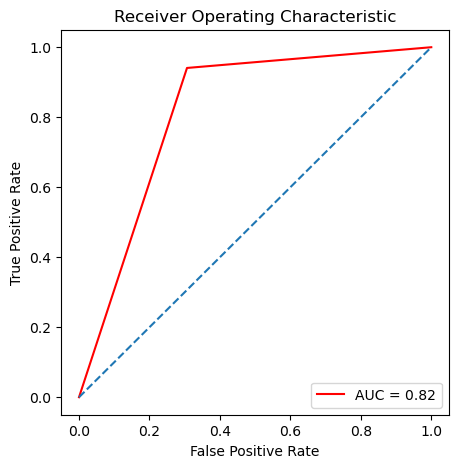

In [91]:
# plotting the Roc/Auc curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [92]:
# Printing the test accuracy, recall and precision
print("Test Accuracy:",round(metrics.accuracy_score(y_test,y_pred_random)*100,2),"%")
print("Test Recall:",round(metrics.recall_score(y_test,y_pred_random)*100,2),"%")
print("Test Precision:",round(metrics.precision_score(y_test,y_pred_random)*100,2),"%")

Test Accuracy: 81.47 %
Test Recall: 94.08 %
Test Precision: 74.7 %


### Reverse Engineering

In [93]:
# Gauging the profitable segment from Decision Tree Model as it gave the highest accuracy, recall and precision values

In [94]:
# Checking the data type of predictions by Decision Tree on the test dataset i.e. y_pred_test 
type(y_pred_test)

numpy.ndarray

In [95]:
# Getting the y_pred_test values in a dataframe
test_data= pd.DataFrame(y_pred_test)

In [96]:
# Getting the y_prob_train values in a dataframe
# y_prob_train is the predicted values by Decision Tree Model over training dataset
train_data = pd.DataFrame(y_prob_train)
train_data

,0
0,1
1,0
2,0
3,0
4,1
...,...
25190,1
25191,1
25192,0
25193,1


In [97]:
# concating the train and test data
combined = pd.concat([train_data,test_data])

In [98]:
# Resetting the index
combined = combined.reset_index(drop=True)

In [99]:
# Checking the main dataframe: df
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,yyyy,Age,Group,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,94,86,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,5157,47,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,9785,72,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,13424,2,2017-02-21,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016,New South Wales,Australia,10


In [100]:
# Adding the predicted values of Decision Tree Model over Training and Test Dataset in the main dataframe: df
df['Predicted'] = combined

In [101]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,yyyy,Age,Group,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,address,postcode,state,country,property_valuation,Predicted
0,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,94,86,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016,New South Wales,Australia,10,1
1,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016,New South Wales,Australia,10,0
2,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,5157,47,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,New South Wales,Australia,10,0
3,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,9785,72,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016,New South Wales,Australia,10,0
4,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11,1953,64,56-65,13424,2,2017-02-21,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016,New South Wales,Australia,10,1


In [102]:
# Define the UDF to calculate the percentage
def calculate_percentage(df, wealth_segment, target_value=1):
    # Calculate the percentage
    percentage = 0
    
    segment_count = df[df['Predicted'] == target_value].shape[0]
    
    if segment_count > 0:
        numerator = df[(df['wealth_segment'] == wealth_segment) & (df['Predicted'] == target_value)].shape[0]
        percentage = (numerator / segment_count) * 100
    
    return percentage

In [103]:
# Prediction of Relative Profit Percentage for each Wealth Segment by Model - Decision Tree (Balanced Data set)
for i in df['wealth_segment'].unique():
    print(i +"=", calculate_percentage(df, i))

Mass Customer= 50.22964205001094
Affluent Customer= 24.327476853539405
High Net Worth= 25.44288109644966


In [104]:
# Inference: Ship Rocket ( Our Client) should focus on targetting Mass Customer Wealth Segment as it comes out to be the most profit segment amongst all

## Exploring the Potential Customer Dataset

In [105]:
### Reading the file and going through the data

In [106]:
New_customer = pd.read_excel("NewCustomerlist.xlsx")

In [107]:
New_customer.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age
0,Male,86,Manufacturing,Mass Customer,Yes,14,4500,Queensland,Australia,6,60
1,Male,69,Property,Mass Customer,No,16,2113,New South Wales,Australia,11,47
2,Female,10,Financial Services,Affluent Customer,No,10,3505,Victoria,Australia,5,43
3,Female,64,Manufacturing,Affluent Customer,Yes,5,4814,Queensland,Australia,1,38
4,Female,34,Financial Services,Affluent Customer,No,19,2093,New South Wales,Australia,9,52


In [108]:
New_customer.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'country', 'property_valuation', 'Age'],
      dtype='object')

In [109]:
# Things to do if want to use below data pipeline
# Ensure null dob values are dropped, Age column is derived, null values in job industry category is imputed, and all the columns that i dropped and values in state field that were changed are undo-ed before using the below pipeline

# Below Code to be referred for model building on the potential customer data set
# Not doing here since it is not required as per the assignment
# Just showing Data Pipeline Code for Curious Learners

import pandas as pd
from sklearn import preprocessing

def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

def transform_data(df, state_mapping, label_encoding_cols, one_hot_encoding_cols):
    # Replace values in 'state' column using the mapping dictionary
    df['state'] = df['state'].replace(state_mapping)
    
    # Label Encoding
    label_encoder = preprocessing.LabelEncoder()
    for column in label_encoding_cols:
        df[column] = label_encoder.fit_transform(df[column])

    # One-Hot Encoding
    df = pd.get_dummies(df, columns=one_hot_encoding_cols, drop_first=True)
    
    # Identify boolean columns by their data type (bool):
    boolean_columns = df.select_dtypes(include=['bool']).columns
    # Convert boolean columns to integers (0s and 1s)
    df[boolean_columns] = df[boolean_columns].astype(int)
    
    return df

def transform_pipeline(file_path):
    try:
        # Step 1: Data loading
        new_df = pd.read_excel(file_path)

        # Step 2: Replace values in 'state' column using the mapping dictionary
        state_mapping = {
            'QLD': 'Queensland',
            'VIC': 'Victoria',
            'NSW': 'New South Wales'
        }

        # Step 3: Dropping columns
        columns_to_drop = ['first_name','last_name', 'country', 'DOB', 'address', 'Rank', 'Value'
        'job_title','deceased_indicator','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20']
        
        new_df = drop_columns(new_df, columns_to_drop)

        # Step 4: Data transformation (with label encoding and state replacement)
        label_encoding_cols = ['wealth_segment', 'state', 'job_industry_category']
        one_hot_encoding_cols = ['owns_car', 'state', 'gender']
        new_df = transform_data(new_df, state_mapping, label_encoding_cols, one_hot_encoding_cols)
        

        return new_df

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Example usage:
if __name__ == "__main__":
    transformed_df = transform_pipeline("NewCustomerlist.xlsx")
    if transformed_df is not None:
        print("DataFrame after pipeline transformation:")
        print(transformed_df.head())